In [1]:
import os
import json
import pandas as pd
import numpy as np
from urllib.parse import urlencode
import requests
import codecs
import time
import datetime
import itertools
from tqdm import tqdm
import operator

from DataRead import Read
from Tactic import MACD, SMA, MultiTacs, Tactic
from DataQuery import Ticker, Query

In [2]:
read=Read()
df_kline=read.read_kline(freq_type='4h',market='ETHUSDT')
s_date='2023-2-1'
today=datetime.datetime.today()
e_date=today.strftime('%Y-%m-%d')
df_kline=df_kline.loc[s_date:e_date]
short_flag = True

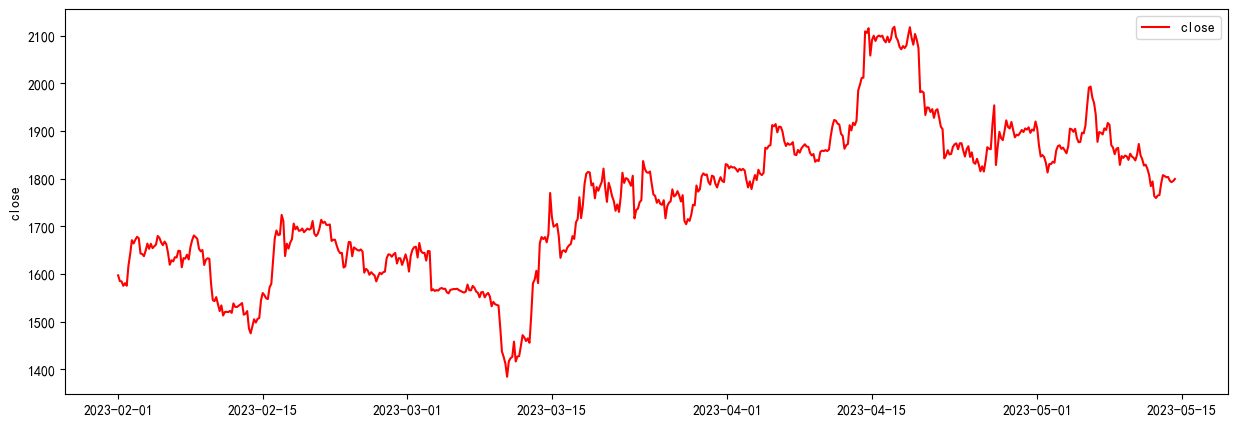

In [3]:
tactic=Tactic()
tactic.plot_price_return(df_kline)

In [4]:
read=Read()
df_kline=read.read_kline(freq_type='1d',market='ETHUSDT')

s_date='2023-3-1'
today=datetime.datetime.today()
e_date=today.strftime('%Y-%m-%d')

# s_date='2021-1-1'
# e_date='2021-12-31'

short_flag = True

multi_tacs=MultiTacs()
tacs=['SMA','DEA','EMA']
df_multi_tac_returns=multi_tacs.multi_tac_returns(df_kline,tacs=tacs, start=s_date, end=e_date,short_flag=short_flag)
# df_multi_tac_returns2=multi_tacs.multi_tac_returns(df_kline,tacs=tacs, start=s_date, end=e_date,short_flag=short_flag)


In [5]:
df_multi_tac_returns

,tac_name,price_return,strategy_return,strategy_diff,price_drawdown,strategy_drawdown
0,SMA,0.080212,-0.076947,-0.157159,-0.1531,-0.2284
1,DEA,0.080212,-0.078959,-0.159170,-0.1531,-0.1687
2,EMA,0.080212,-0.135635,-0.215847,-0.1531,-0.2644


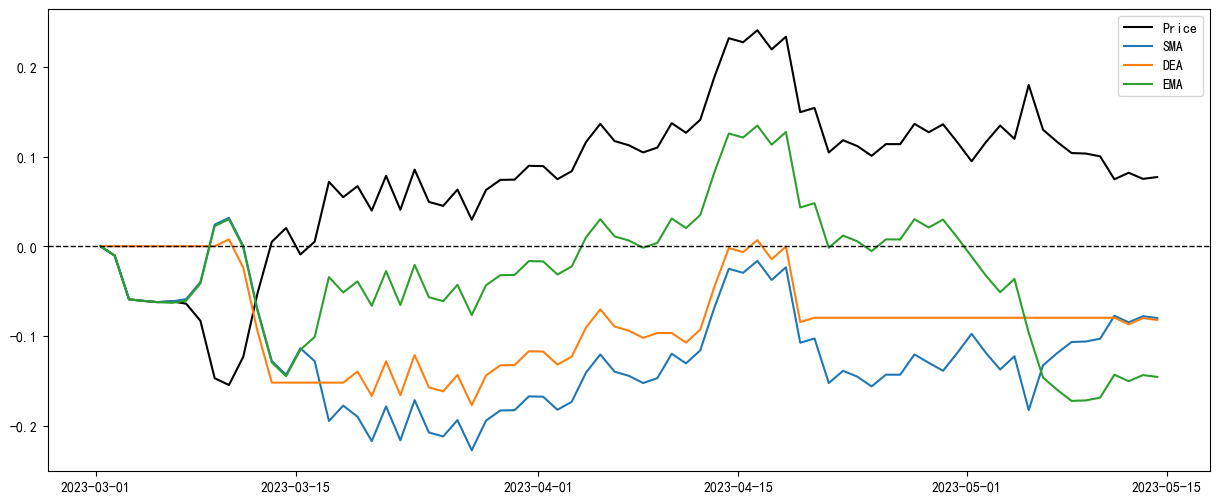

In [6]:
multi_tacs.plot_multi_tac_returns(df_kline,tacs=tacs, start=s_date, end=e_date,short_flag=short_flag)

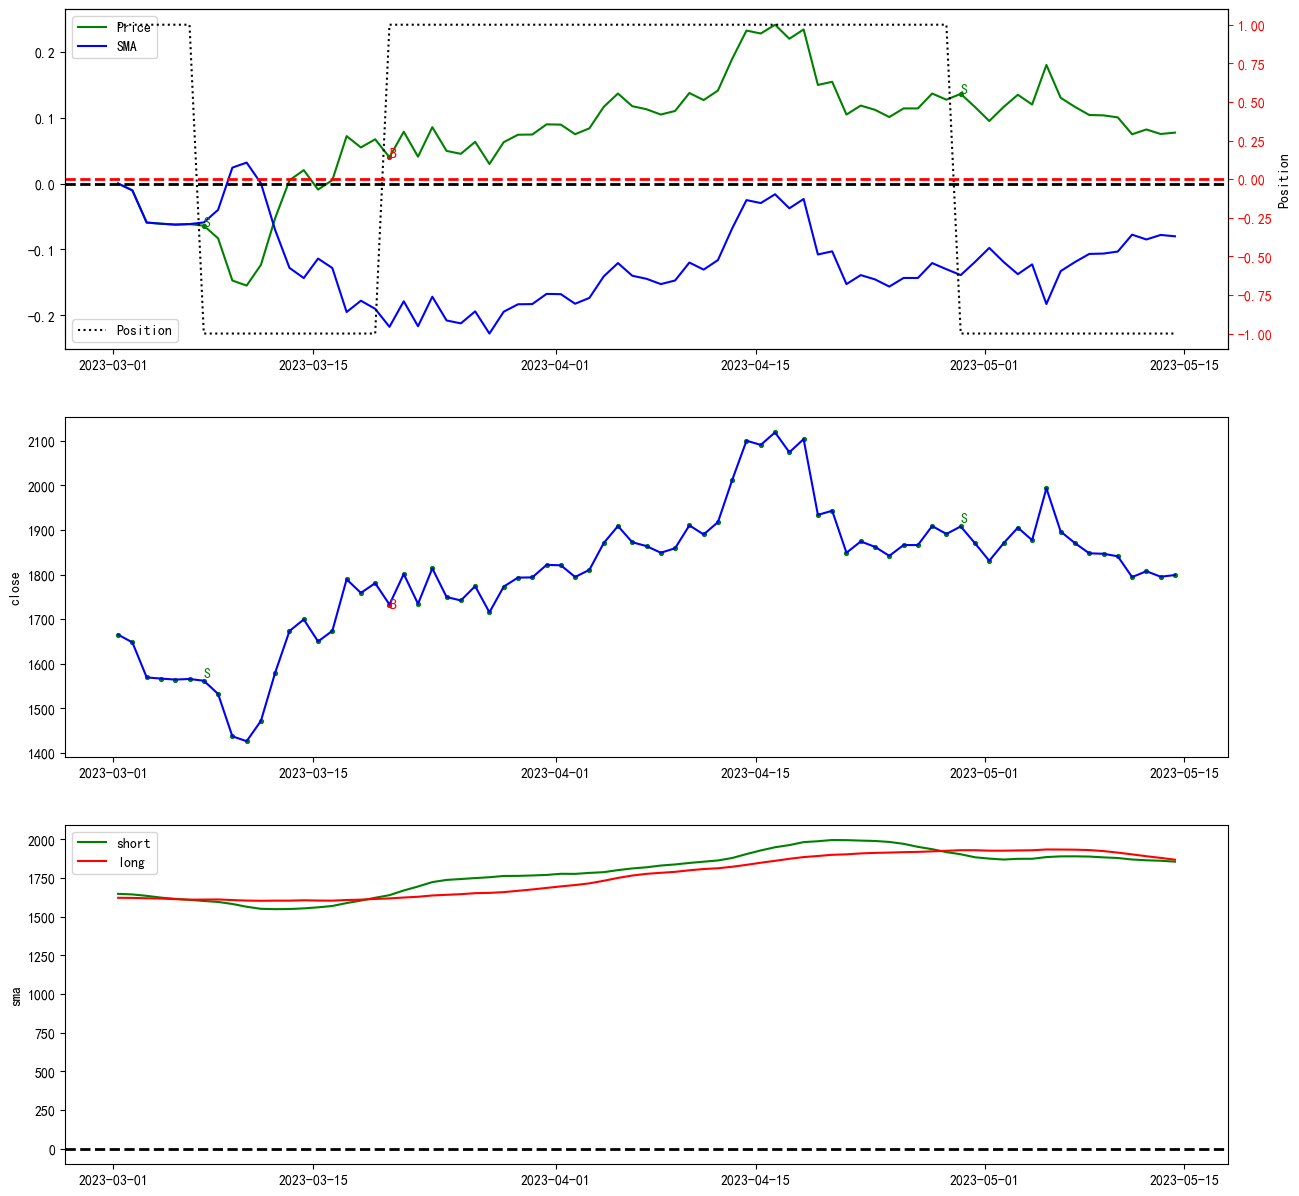

Trade Date:  2023-05-14 08:00:00
Deal:  SHORT
Position:  -1.0
Quote Price:  1795.12
Closing Price: 1798.79
Price Return: 0.21%
Strategy Return: -0.20%


In [7]:
sma=SMA()
df_sma=sma.sma_tac(df=df_kline,enable_short=short_flag)
df_sma=df_sma.loc[s_date:e_date].copy()
df_sma=sma.complete_returns(df_sma)
sma.plot_sma_return(df=df_sma,start=s_date,end=e_date)
sma.trade_call(df_sma)

In [15]:
# test params
macd=MACD()
tac=Tactic()

s_date='2023-2-2'
e_date='2023-4-13'
# today=datetime.datetime.today()
# e_date=today.strftime('%Y-%m-%d')


short_list=np.arange(6,25,step=3)
long_list=np.arange(26,121,step=6)
median_list=np.arange(9,21,step=3)

test_result=[]
params_combines = itertools.product(short_list, long_list, median_list)

count=len(short_list)*len(long_list)*len(median_list)

for i in tqdm(range(count),ncols=90,desc='正在迭代计算...'):
    param = next(params_combines)
    short = param[0]
    long = param[1]
    median = param[2]
    df = macd.dea_tac(df=df_kline, short=short,long=long,median=median,enable_short=short_flag)
    df=df.loc[s_date:e_date].copy()
    strategy_return = macd.tac_return(df)
    test_result.append([short, long, median, strategy_return])

cols=['short','long','median','strategy_return']
params_df = pd.DataFrame(data=test_result,columns=cols)
params_df = params_df.sort_values(by='strategy_return',ascending=False, ignore_index=True)
short_est = params_df.loc[0,'short']
long_est = params_df.loc[0,'long']
median_est = params_df.loc[0,'median']
tac_return_est = params_df.loc[0,'strategy_return']
print(params_df.iloc[0])
print('Price Return:',round(macd.base_return(df=df),4))

正在迭代计算...: 100%|██████████████████████████████████| 448/448 [00:08<00:00, 50.66it/s]

short              18.00000
long               32.00000
median             12.00000
strategy_return     0.21943
Name: 0, dtype: float64
Price Return: 0.2245


In [14]:
short_est, long_est, median_est

(15, 32, 15)

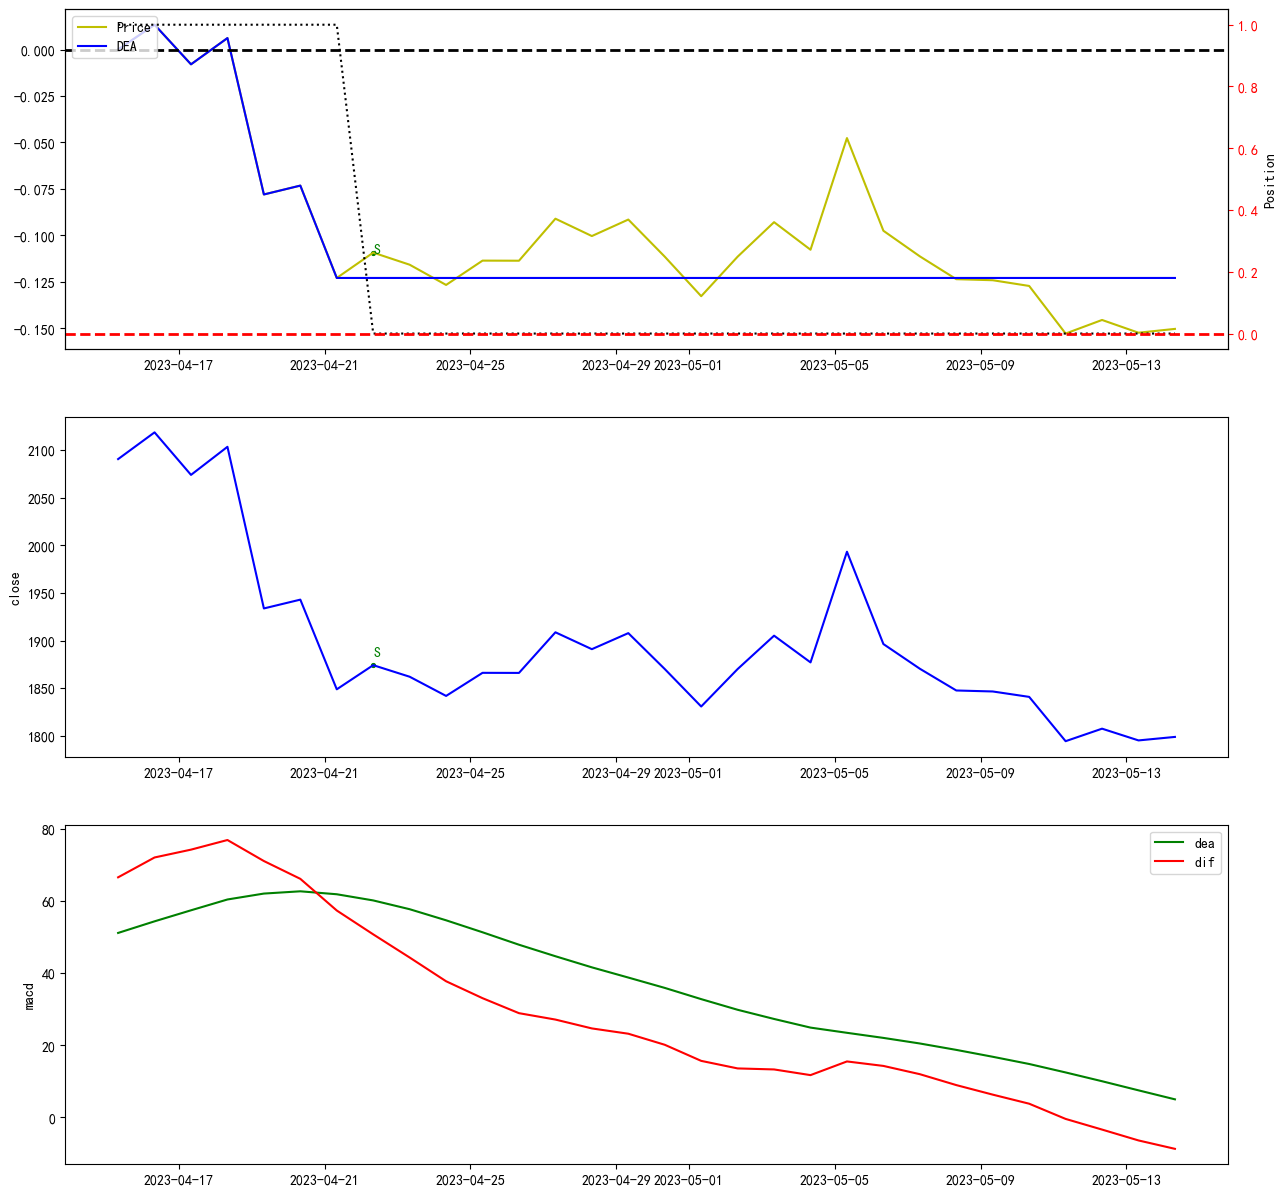

Trade Date:  2023-05-14 08:00:00
Deal:  Close Out
Position:  0.0
Closing Price: 1798.79
Price Return: 0.21%
Strategy Return: 0.00%


In [16]:
s_date='2023-4-15'
e_date='2023-5-14'
macd=MACD()
df=macd.dea_tac(df=df_kline,short=short_est, long=long_est,median=median_est, enable_short=short_flag)
df=df.loc[s_date:e_date].copy()
df=macd.complete_returns(df)
macd.plot_dea_return(df=df,start=s_date,end=e_date)
macd.trade_call(df)